In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score
import keras as ks 

In [2]:
housing =fetch_california_housing()


In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
X = pd.DataFrame(housing.data, columns = housing.feature_names)

In [6]:
y = housing.target

In [7]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [8]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [9]:
#validate the data --- to check the overfittig during training 
from sklearn.model_selection import train_test_split
X_train_full,X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.25, random_state = 42) 


In [10]:
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [11]:
#validation
X_train,X_valid,y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_valid_sc = scaler.transform(X_valid)
X_test_sc = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
# how you get to know my model is not overfitting
#When accuracy of testing and training data are equivalent
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [16]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_pred=lr.predict(X_test_sc)
print("mse: ", mean_squared_error(y_test, y_pred))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("r2: ", r2_score(y_test, y_pred))

mse:  0.5416495457975024
mae:  0.5304369421957167
r2:  0.590657395189535


In [17]:
#training Prediction 
y_train_pr = lr.predict(X_train_sc)
r2_score(y_train, y_train_pr)
print("mse: ", mean_squared_error(y_train, y_train_pr))
print("mae: ", mean_absolute_error(y_train, y_train_pr))


mse:  0.5269443395680388
mae:  0.5343232652862433


In [18]:
Ridge = RidgeCV()
Ridge.fit(X_train_sc, y_train)
y_pred=Ridge.predict(X_test_sc)
print("mse: ", mean_squared_error(y_test, y_pred))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("r2: ", r2_score(y_test, y_pred))

mse:  0.5412343385974236
mae:  0.5303793924246872
r2:  0.5909711811017268


In [19]:
Lasso = LassoCV()
Lasso.fit(X_train_sc, y_train)
y_pred=Lasso.predict(X_test_sc)
print("mse: ", mean_squared_error(y_test, y_pred))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("r2: ", r2_score(y_test, y_pred))

mse:  0.5381198480855753
mae:  0.5369482592974792
r2:  0.5933249053292627


''elastic = ElasticNet()
elastic.fit(X_train_sc, y_train)
y_pred=Lasso.predict(X_test_sc)
print("mse: ", mean_squared_error(y_test, y_pred))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("r2: ", r2_score(y_test, y_pred))'''

In [20]:
#ANN model 
Layers= [ks.layers.Dense(30, activation = 'relu', input_shape= X_train_sc.shape[1:]),
         ks.layers.Dense(10, activation = 'relu'),
         ks.layers.Dense(5, activation = 'relu'),
         ks.layers.Dense(1)
        ]


In [21]:
model_ann=ks.models.Sequential(Layers)

In [22]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# when we have more outliers use mae 
LOSS = "mse"
OPTIMIZER = "sgd"
model_ann.compile(optimizer = OPTIMIZER, loss = LOSS)

In [24]:
#Epochs is no of iterations
#loss == mse for train data
Epochs = 40
history=model_ann.fit(X_train_sc, y_train, epochs=Epochs, validation_data=(X_valid_sc,y_valid))


Epoch 1/40

387/387 [==============================] - 2s 2ms/step - loss: 0.7979 - val_loss: 0.5188
Epoch 2/40
387/387 [==============================] - 1s 2ms/step - loss: 0.5018 - val_loss: 0.4427
Epoch 3/40
387/387 [==============================] - 1s 2ms/step - loss: 0.4519 - val_loss: 0.4142
Epoch 4/40
387/387 [==============================] - 1s 2ms/step - loss: 0.4303 - val_loss: 0.3964
Epoch 5/40
387/387 [==============================] - 1s 2ms/step - loss: 0.4137 - val_loss: 0.3835
Epoch 6/40
387/387 [==============================] - 1s 2ms/step - loss: 0.4020 - val_loss: 0.3765
Epoch 7/40
387/387 [==============================] - 1s 2ms/step - loss: 0.3917 - val_loss: 0.3644
Epoch 8/40
387/387 [==============================] - 1s 2ms/step - loss: 0.3829 - val_loss: 0.3747
Epoch 9/40
387/387 [==============================] - 1s 2ms/step - loss: 0.3743 - val_loss: 0.3448
Epoch 10/40
387/387 [==============================] - 1s 2ms/step - loss: 0.3664 - val_loss: 0.345

<Axes: >

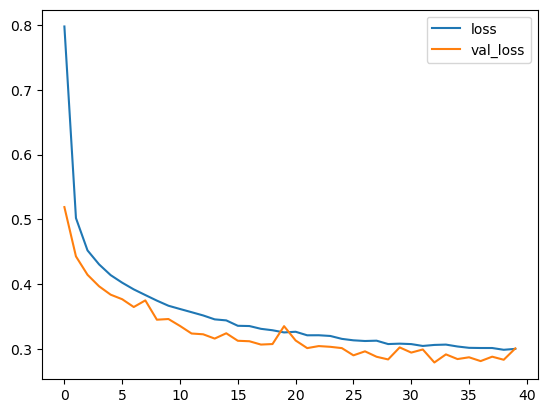

In [25]:
pd.DataFrame(history.history).plot()

In [26]:
model_ann.evaluate(X_test_sc,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3227


0.32266464829444885

In [27]:
y_pred_ann=model_ann.predict(X_test_sc)

162/162 [==============================] - 0s 2ms/step


In [28]:
mean_squared_error(y_pred_ann, y_test)

0.32266467992989933

In [29]:
r2_score(y_pred_ann, y_test)

0.7355491580443263

In [30]:
#!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data_with_const = add_constant(X_train_full)

vif_data = pd.DataFrame()
vif_data["Variable"] = data_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]



In [31]:
print(vif_data)

     Variable           VIF
0       const  16858.524431
1      MedInc      2.528610
2    HouseAge      1.236013
3    AveRooms      8.117246
4   AveBedrms      6.804995
5  Population      1.133877
6    AveOccup      1.010129
7    Latitude      9.147410
8   Longitude      8.821280


In [32]:
#batch normalization
Layers= [ks.layers.Dense(30, activation = 'relu', input_shape= X_train_sc.shape[1:]),
         ks.layers.BatchNormalization(),
         ks.layers.Dense(10, activation = 'relu'),
         ks.layers.BatchNormalization(),
         ks.layers.Dense(5, activation = 'relu'),
         ks.layers.BatchNormalization(),
         ks.layers.Dense(1)
        ]

In [33]:
model_ann1=ks.models.Sequential(Layers)

In [34]:
model_ann1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                270       
                                                                 
 batch_normalization (Batch  (None, 30)                120       
 Normalization)                                                  
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 batch_normalization_1 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 batch_normalization_2 (Bat  (None, 5)                

In [35]:
LOSS = "mse"
OPTIMIZER = "sgd"
model_ann1.compile(optimizer = OPTIMIZER, loss = LOSS)

In [36]:
Epochs = 40
history=model_ann1.fit(X_train_sc, y_train, epochs=Epochs, validation_data=(X_valid_sc,y_valid))


Epoch 1/40
387/387 [==============================] - 2s 3ms/step - loss: 0.7843 - val_loss: 0.5610
Epoch 2/40
387/387 [==============================] - 1s 3ms/step - loss: 0.4903 - val_loss: 0.4921
Epoch 3/40
387/387 [==============================] - 1s 3ms/step - loss: 0.4649 - val_loss: 0.5142
Epoch 4/40
387/387 [==============================] - 1s 3ms/step - loss: 0.4381 - val_loss: 0.4766
Epoch 5/40
387/387 [==============================] - 1s 3ms/step - loss: 0.4403 - val_loss: 0.5007
Epoch 6/40
387/387 [==============================] - 1s 3ms/step - loss: 0.4263 - val_loss: 0.4704
Epoch 7/40
387/387 [==============================] - 1s 3ms/step - loss: 0.4227 - val_loss: 0.4411
Epoch 8/40
387/387 [==============================] - 1s 3ms/step - loss: 0.4124 - val_loss: 0.4513
Epoch 9/40
387/387 [==============================] - 1s 3ms/step - loss: 0.4045 - val_loss: 0.4037
Epoch 10/40
387/387 [==============================] - 1s 3ms/step - loss: 0.4074 - val_loss: 0.3963

In [39]:
y_pred_ann1=model_ann1.predict(X_test_sc)

162/162 [==============================] - 0s 2ms/step


In [40]:
mean_squared_error(y_pred_ann1, y_test)

0.3170574998105281

In [41]:
r2_score(y_pred_ann1, y_test)

0.68043701408647

In [42]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lr,open('lr.pkl','wb'))


In [43]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000
